In [1]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from package import  DMG, clustering, mclust_R

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/simulation_triple_adata.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1296 × 1000
    obs: 'mclust', 'SpatialGlue', 'MISO_2', 'MISO_3', 'MISO_4', 'MISO_5', 'MISO_6', 'MISO_7', 'MISO_8', 'no_image', 'annotation', 'RNA', 'ADT', 'Modality1', 'Modality3', 'ATAC', 'Modality2'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'MISO_5_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'nsfac', 'spatial', 'spfac'
    varm: 'nsload', 'spload'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [3]:
import scanpy as sc
import numpy as np
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
def mclust_clustering(adata, used_obsm='X_pca',useX=False, num_cluster=5, modelNames='EEE', random_seed=0):
    np.random.seed(random_seed)
    # 导入 R 中的 mclust 包
    robjects.r.library("mclust")
    rpy2.robjects.numpy2ri.activate()
    r_random_seed = robjects.r['set.seed']
    r_random_seed(random_seed)
    rmclust = robjects.r['Mclust']
    print(used_obsm)
    if useX:
        res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(adata.X), num_cluster, modelNames)
    else:
        res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(adata.obsm[used_obsm]), num_cluster, modelNames)
    print(res)
    mclust_res = np.array(res[-2])

    # 将聚类结果添加到 adata 的观测数据中
    adata.obs['mclust'] = mclust_res
    adata.obs['mclust'] = adata.obs['mclust'].astype('int')
    adata.obs['mclust'] = adata.obs['mclust'].astype('category')
    return adata


In [5]:

file_fold = '/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/'
adata1 = sc.read_h5ad(file_fold + 'adata_RNA_processed.h5ad')
# adata1 = adata1[:, adata.var.highly_variable]
# sc.pp.scale(adata1)
# sc.tl.pca(adata1)
# adata1.obsm['X_pca'] = adata1.obsm['X_pca'][:, :40]
# adata1 = mclust_clustering(adata1)
print(adata1)

AnnData object with n_obs × n_vars = 1296 × 1000
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'feat', 'nsfac', 'spatial', 'spfac'
    varm: 'nsload', 'spload'
    layers: 'counts'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


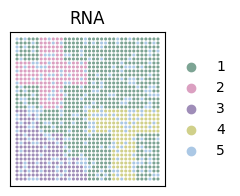

In [5]:

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata1.uns['mclust_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/RNA.png'
fig, ax = plt.subplots(figsize=(2, 2))
sc.pl.embedding(adata1, basis='spatial', color='mclust', ax=ax, title='RNA', s=20, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [6]:
adata.write(adata_file)

AnnData object with n_obs × n_vars = 1296 × 100
    uns: 'log1p'
    obsm: 'feat', 'nsfac', 'spatial', 'spfac'
    varm: 'nsload', 'spload'
    layers: 'counts'


In [6]:
file_fold = '/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/'
adata1 = sc.read_h5ad(file_fold + 'adata_ADT_processed.h5ad')
print(adata1)
#used_obsm_key = 'feat'
# sc.pp.scale(adata1)
# sc.tl.pca(adata1)
# adata1.obsm['X_pca'] = adata1.obsm['X_pca'][:, :20]
# adata1 = mclust_clustering(adata1)
# print(adata1)

# custom_colors = [
#     '#7da494',  # Gold
#     '#dba0c1',  # BlueViolet
#     '#9f8db8',  # qianzi
#     '#d0d08a',  # Blue
#     '#abc8e5',  # molv
#     '#e5a79a',  # tufen
# ]
# adata1.uns['mclust_colors'] = custom_colors

# import matplotlib.pyplot as plt
# output_path = '/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/ADT.png'
# fig, ax = plt.subplots(figsize=(2, 2))
# sc.pl.embedding(adata1, basis='spatial', color='mclust', ax=ax, title='ADT', s=20, show=False)
# ax.get_yaxis().set_visible(False)
# ax.get_xaxis().set_visible(False)
# plt.savefig(output_path, format='png')  
# plt.show()


AnnData object with n_obs × n_vars = 1296 × 100
    uns: 'log1p'
    obsm: 'feat', 'nsfac', 'spatial', 'spfac'
    varm: 'nsload', 'spload'
    layers: 'counts'


In [46]:
adata.obs['RNA']=adata1.obs['mclust']

In [3]:
import scanpy as sc
import numpy as np
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
def mclust_clustering(adata, used_obsm='X_pca',useX=False, num_cluster=5, modelNames='EEE', random_seed=0):
    np.random.seed(random_seed)
    # 导入 R 中的 mclust 包
    robjects.r.library("mclust")
    rpy2.robjects.numpy2ri.activate()
    r_random_seed = robjects.r['set.seed']
    r_random_seed(random_seed)
    rmclust = robjects.r['Mclust']
    print(used_obsm)
    if useX:
        #res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(adata.X[:, :300]), num_cluster, modelNames)
        res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(adata.X), num_cluster, modelNames)
    else:
        res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(adata.obsm[used_obsm]), num_cluster, modelNames)
    print(res)
    mclust_res = np.array(res[-2])

    # 将聚类结果添加到 adata 的观测数据中
    adata.obs['mclust'] = mclust_res
    adata.obs['mclust'] = adata.obs['mclust'].astype('int')
    adata.obs['mclust'] = adata.obs['mclust'].astype('category')
    return adata


AnnData object with n_obs × n_vars = 1296 × 1000
    uns: 'log1p'
    obsm: 'nsfac', 'spatial', 'spfac'
    varm: 'nsload', 'spload'
    layers: 'counts'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


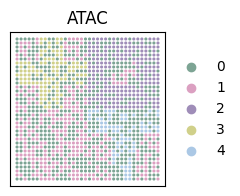

In [7]:
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/'
adata1 = sc.read_h5ad(file_fold + 'adata_ATAC.h5ad')
print(adata1)
sc.pp.filter_genes(adata1, min_cells=10)
sc.pp.highly_variable_genes(adata1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)

adata_hvg = adata1[:, adata1.var['highly_variable']]
sc.tl.pca(adata1, n_comps=50)
sc.pp.neighbors(adata1, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata1, resolution=0.01)
custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/ATAC.png'
fig, ax = plt.subplots(figsize=(2, 2))
sc.pl.embedding(adata1, basis='spatial', color='leiden', ax=ax, title='ATAC', s=20, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [9]:
adata.obs['ATAC']=adata1.obs['leiden']
adata.obs['Modality2']=adata.obs['ATAC']

In [10]:
adata.write(adata_file)

In [16]:
import pandas as pd
gd1=pd.read_csv("/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/Simulation_triple_groundtruth.csv")
adata.obs['annotation']=gd1['Ground_Truth']

In [4]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/"
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/none_Simulation_triple_0.8_0.4_0.7_50_mclust_5_DMG_embedding_mclust5.csv')
adata.obs['no_image'] = cluster['mclust'].values
print(adata)
adata.write(adata_file)

AnnData object with n_obs × n_vars = 1296 × 1000
    obs: 'mclust', 'SpatialGlue', 'MISO_2', 'MISO_3', 'MISO_4', 'MISO_5', 'MISO_6', 'MISO_7', 'MISO_8', 'no_image', 'annotation'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'MISO_5_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'nsfac', 'spatial', 'spfac'
    varm: 'nsload', 'spload'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [ ]:
import scanpy as sc
adata=sc.read(adata_file)
custom_colors = [
    
    '#8F9D27',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#D0D1CD',
      
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#DD5D6A',
    '#E17065',
    '#669999',
]

adata.uns['annotation_colors'] = custom_colors
adata.uns['SpatialGlue_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['ADT_colors'] = custom_colors
adata.uns['MISO_5_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
# adata.write(adata_file)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [23]:
import pandas as pd
import anndata

# 假设你已经读取了 gd 数据框
gd = pd.read_csv('/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/Simulation_triple_groundtruth.csv')
print(gd)
# 假设 adata 是你的 AnnData 对象
# 这里只是示例创建，实际使用时应替换为你的 adata 对象
# adata = anndata.read_h5ad('your_adata_file.h5ad')

# 创建一个字典，键为 gd 第一列的值（转换为字符串），值为 gd['Ground_Truth'] 列的值
mapping_dict = dict(zip(map(str, gd.iloc[:, 0]), gd['Ground_Truth']))

# 根据 adata 的 obsname 顺序从 mapping_dict 中获取对应的值
annotations = [mapping_dict.get(name) for name in adata.obs_names]

# 将获取到的注释信息赋值给 adata.obs['annotation']
adata.obs['annotation'] = annotations

# 打印结果进行验证
print(adata.obs)

      Barcode  array_row  array_col  Ground_Truth
0         529   0.857143   0.400005             4
1         478  -0.857143   0.514291             2
2         234   0.057143   1.314291             4
3          64   1.200000   1.885719             4
4        1087  -1.200000  -1.428566             1
...       ...        ...        ...           ...
1291      956   0.285714  -0.971423             5
1292      734  -0.400000  -0.285709             5
1293     1104   0.742857  -1.428566             3
1294      398  -1.771429   0.742862             2
1295     1190  -1.771429  -1.771424             1

[1296 rows x 4 columns]
     mclust SpatialGlue MISO_2 MISO_3 MISO_4 MISO_5 MISO_6 MISO_7 MISO_8  \
529       1           1      0      0      2      0      5      2      7   
478       2           2      1      0      1      3      3      4      1   
234       3           3      1      1      3      1      0      5      0   
64        3           3      0      0      2      0      5      2      

In [ ]:
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ADT'] = adata.obs['ADT'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['SpatialGlue'] = adata.obs['SpatialGlue'].astype('category')
adata.obs['MISO_5'] = adata.obs['MISO_5'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['annotation'] = adata.obs['annotation'].astype('category')
adata.write(adata_file)

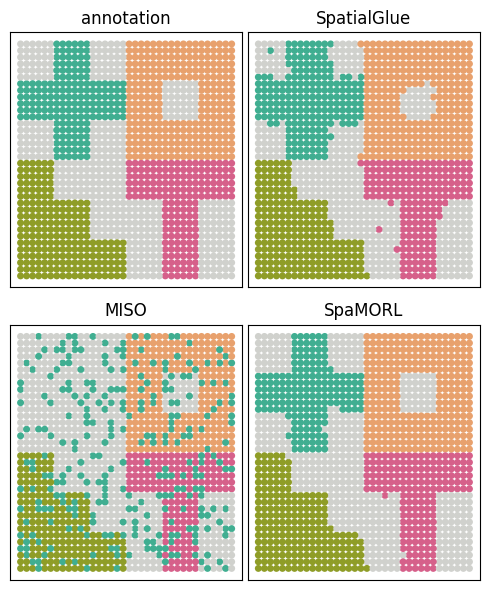

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
adata_file='/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/simulation_triple_adata.h5ad'
adata=sc.read(adata_file)
#plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2,4, figsize=(5,6))  #(7, 4)
s_size = 100
sc.pl.embedding(adata, basis='spatial', color='annotation',title='annotation', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='RNA',title='Modality1', ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='ATAC',title='Modality2', ax=ax_list[1,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='ADT',title='Modality3', ax=ax_list[0,2],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', ax=ax_list[0,3],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_5',title='MISO', ax=ax_list[1,2],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='no_image',title='SpaMORL', ax=ax_list[1,3], s=s_size,show=False)

#ax_list[0, 0].invert_xaxis()


ax_list[0,0].get_legend().remove()
ax_list[0,1].get_legend().remove()
ax_list[1,0].get_legend().remove()
ax_list[1,1].get_legend().remove()

ax_list[0, 0].get_yaxis().set_visible(False)
ax_list[0, 1].get_yaxis().set_visible(False)
ax_list[1, 0].get_yaxis().set_visible(False)
ax_list[1, 1].get_yaxis().set_visible(False)

ax_list[0, 0].get_xaxis().set_visible(False)
ax_list[0, 1].get_xaxis().set_visible(False)
ax_list[1, 0].get_xaxis().set_visible(False)
ax_list[1, 1].get_xaxis().set_visible(False)
plt.tight_layout(w_pad=0.4, h_pad=0.8)
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/'
plt.savefig(file_fold + 'cluster_all.png',format='png')
plt.show()

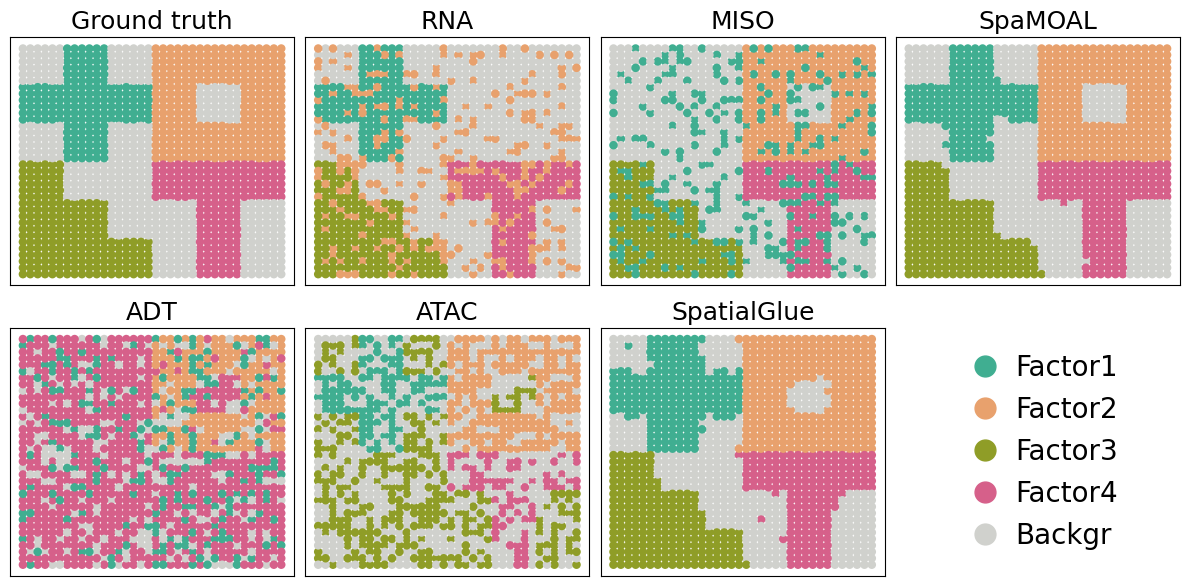

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
import matplotlib.lines as mlines
from matplotlib.lines import Line2D  # 用于创建自定义图例元素

warnings.filterwarnings('ignore')

# 假设 adata 已正确加载
# adata = sc.read(adata_file)

plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2, 4, figsize=(12,6))  # 扩大宽度以容纳右侧图例
s_size = 150

# 绘制子图
sc.pl.embedding(adata, basis='spatial', color='annotation', title='Ground truth', ax=ax_list[0,0], s=s_size, show=False)
color_map= {
    1: '#D0D1CD',
    2: '#40AE91',
    3: '#8F9D27',
    4: '#D6608A',
    5: '#E8A16D',
    }
sc.pl.embedding(adata, basis='spatial', color='RNA',palette=color_map, title='RNA', ax=ax_list[0,1], s=s_size, show=False)
color_map= {
    '0': '#D0D1CD',
    '1': '#8F9D27',
    '2': '#E8A16D',
    '3': '#40AE91',
    '4': '#D6608A',
    }
sc.pl.embedding(adata, basis='spatial', color='ATAC',palette=color_map, title='ATAC', ax=ax_list[1,1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', title='SpatialGlue', ax=ax_list[1,2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_5', title='MISO', ax=ax_list[0,2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='no_image', title='SpaMOAL', ax=ax_list[0,3], s=s_size, show=False)
color_map= {
    1: '#E8A16D',
    2: '#D6608A',
    3: '#D0D1CD',
    4: '#40AE91',
    5: '#D6608A',
    }
sc.pl.embedding(adata, basis='spatial', color='ADT', palette=color_map, title='ADT', ax=ax_list[1,0], s=s_size, show=False)

# 清除 ax_list[1, 3] 上的原始内容并设置为图例区域
ax_list[1, 3].clear()

# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        # ax.invert_yaxis()

# 自定义图例映射
custom_legend = {
    'Factor1':'#40AE91',
    'Factor2' :'#E8A16D', 
   'Factor3' :'#8F9D27',
   'Factor4' :'#D6608A',
   'Backgr' :'#D0D1CD',
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# # 在右侧添加图例
# fig.legend(
#     handles=legend_elements,  # 使用正确的变量名
#     loc='center right',
#     bbox_to_anchor=(1.2, 0.5),
#     frameon=False,
#     title='Cell Types',
#     title_fontsize=12,
#     fontsize=10,
#     ncol=1
# )

# 在右下角子图位置添加图例
ax_list[1, 3].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=1,
    handletextpad=0.1
)
ax_list[1, 3].set_frame_on(False)  # 去除子图边框
plt.tight_layout(w_pad=0.8)  # 增加子图间距
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/'
plt.savefig(file_fold + 'cluster_one_row.png', format='png', bbox_inches='tight')
plt.show()

In [13]:
import pandas as pd
import scanpy as sc

list_annotation = [1,2,3,4,5]
adata.obs['annotation']  = pd.Categorical(adata.obs['annotation'], 
                      categories=list_annotation,
                      ordered=True)
list_MISO_5 = [2,0,4,1,3]
adata.obs['MISO_5']  = pd.Categorical(adata.obs['MISO_5'], 
                      categories=list_MISO_5,
                      ordered=True)                      
list_SpatialGlue = [3,2,4,1,5]
adata.obs['SpatialGlue']  = pd.Categorical(adata.obs['SpatialGlue'], 
                      categories=list_SpatialGlue,
                      ordered=True)
list_no_image = [3,5,4,2,1]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)        

adata.write(adata_file)

In [16]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata = sc.read('/home/lixiangyu/DMG/DMG-main/input/simulated_data/Simulation_triple/simulation_triple_adata.h5ad')
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
#adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}
predicted_labels = adata.obs[f'no_image'].values  # 获取聚类结果
    
# 计算各项指标
ami = AMI(true_labels, predicted_labels)
nmi = NMI(true_labels, predicted_labels)
ari = ARI(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)
v_measure = v_measure_score(true_labels, predicted_labels)
mutual_info = mutual_info_score(true_labels, predicted_labels)

# 将结果存储到字典中
metrics_results[f'result'] = {
    'AMI': ami,
    'NMI': nmi,
    'ARI': ari,
    'Homogeneity': homogeneity,
    'V-measure': v_measure,
    'Mutual Information': mutual_info
}
    

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},",end=" ")
    print()  # 打印一个空行以分隔不同的聚类结果

0.9647, 0.9649, 0.9748, 0.9649, 0.9649, 1.4930, 


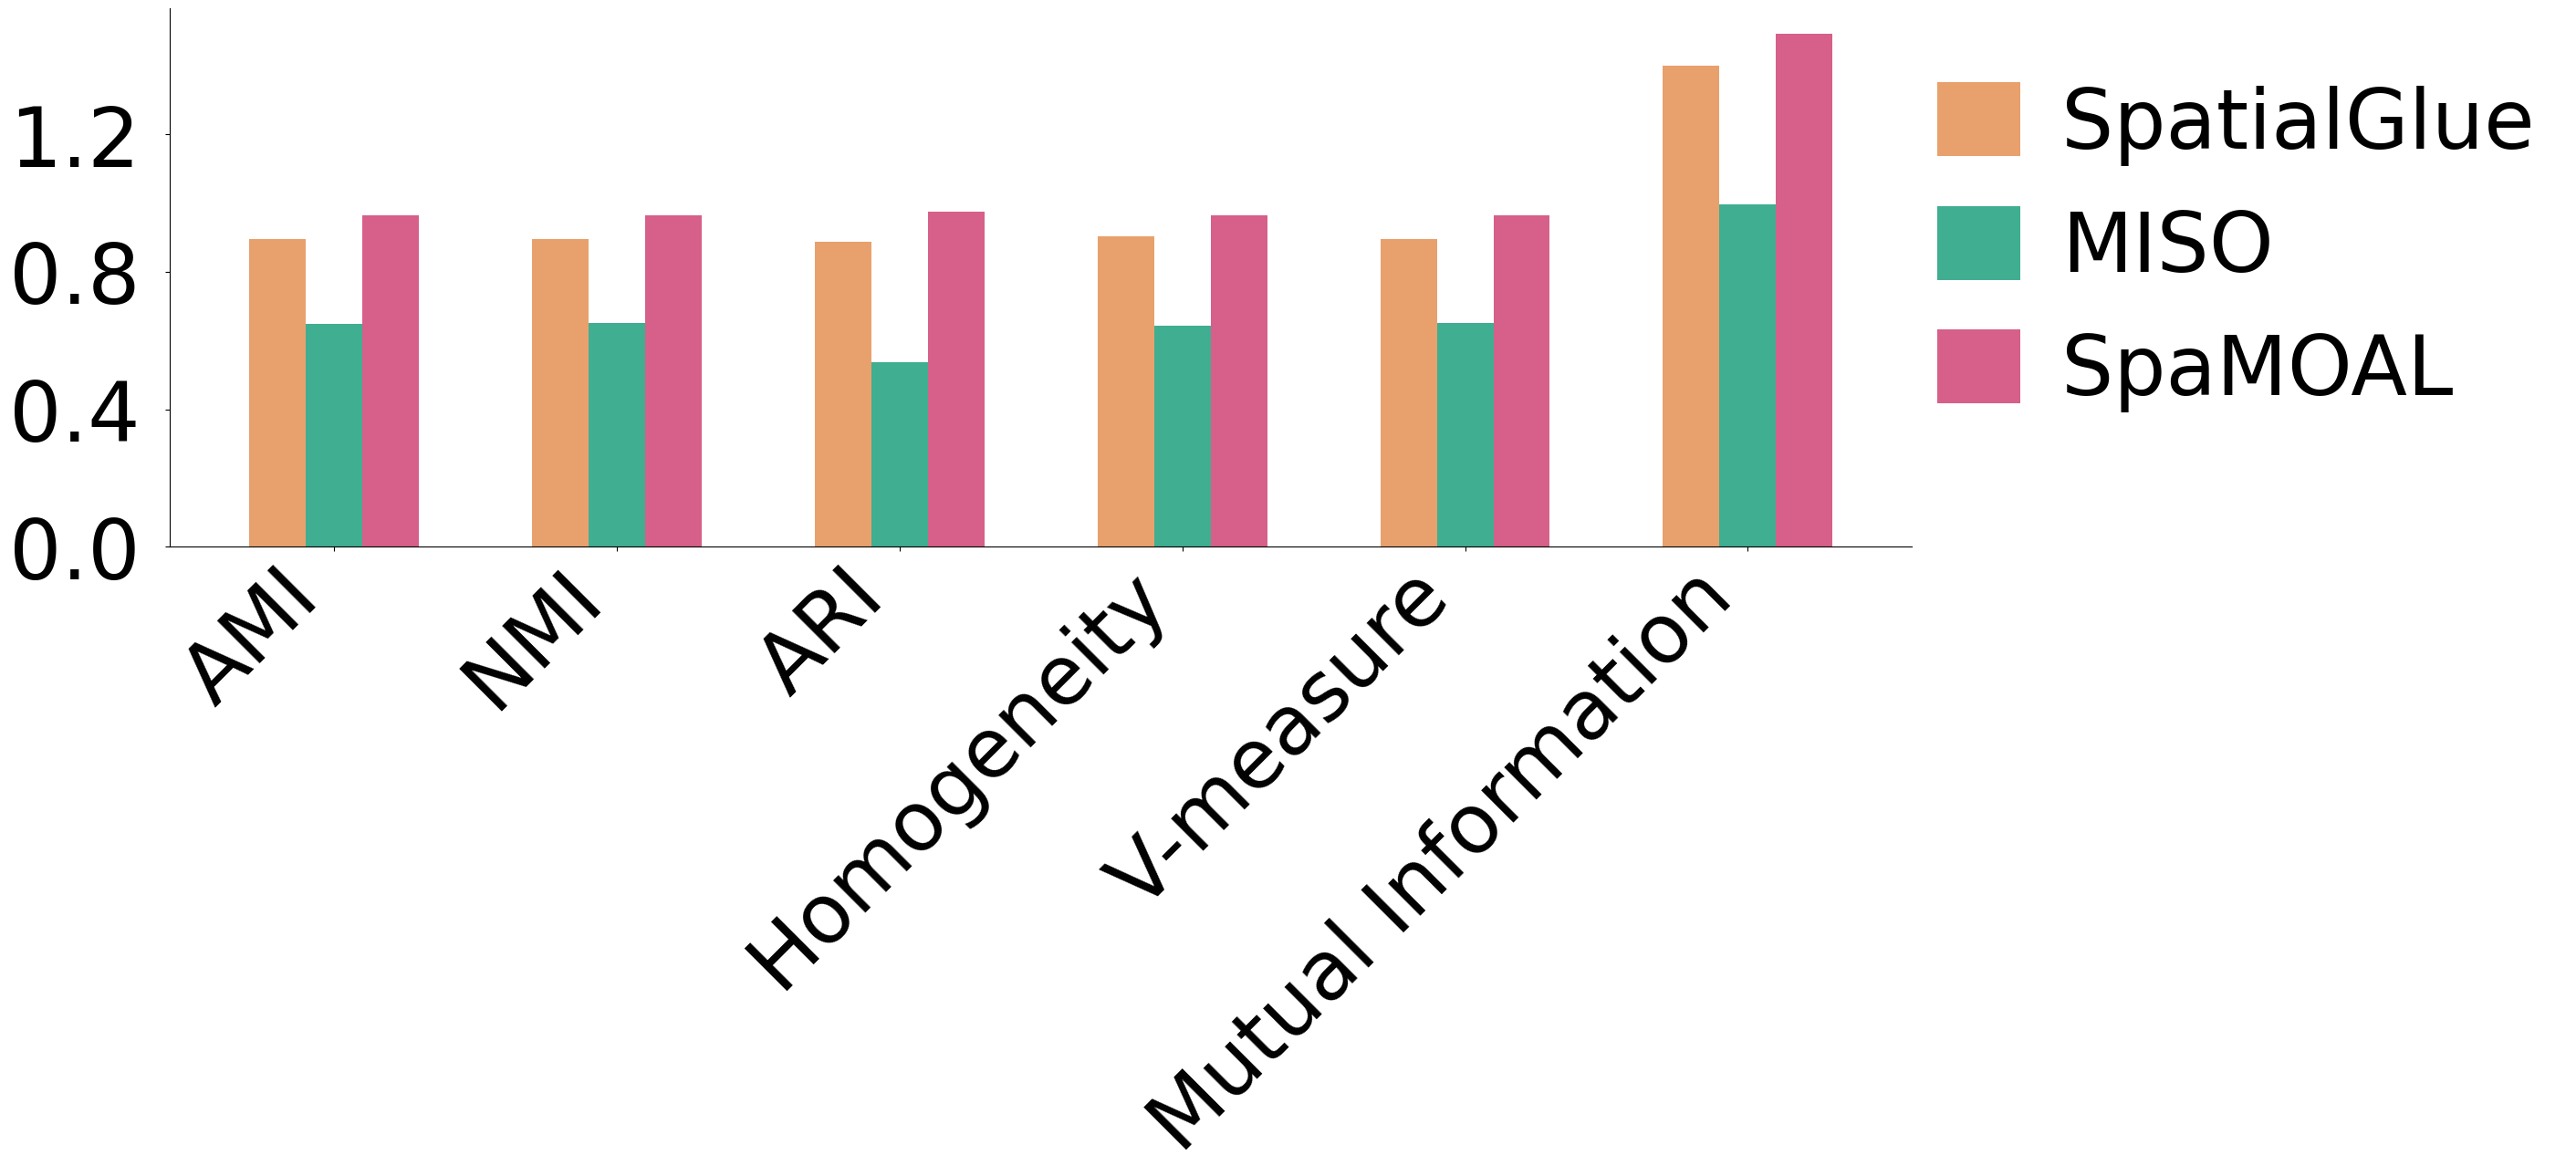

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO', 'SpaMOAL']
data = {
    'SpatialGlue': [0.8961, 0.8965, 0.8874, 0.9043, 0.8965, 1.3993],
    'MISO': [0.6490, 0.6504, 0.5374, 0.6431, 0.6504, 0.9952],
    'SpaMOAL': [0.9647, 0.9649, 0.9748, 0.9649, 0.9649, 1.4930],
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(30, 13))

# 设置条形宽度
bar_width = 0.2
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#D6608A']

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])


# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=65, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()


ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=65,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=65)
ax.tick_params(axis='y', pad=20)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/metrics.png', format='png')  # 修改路径和文件名

plt.show()
    

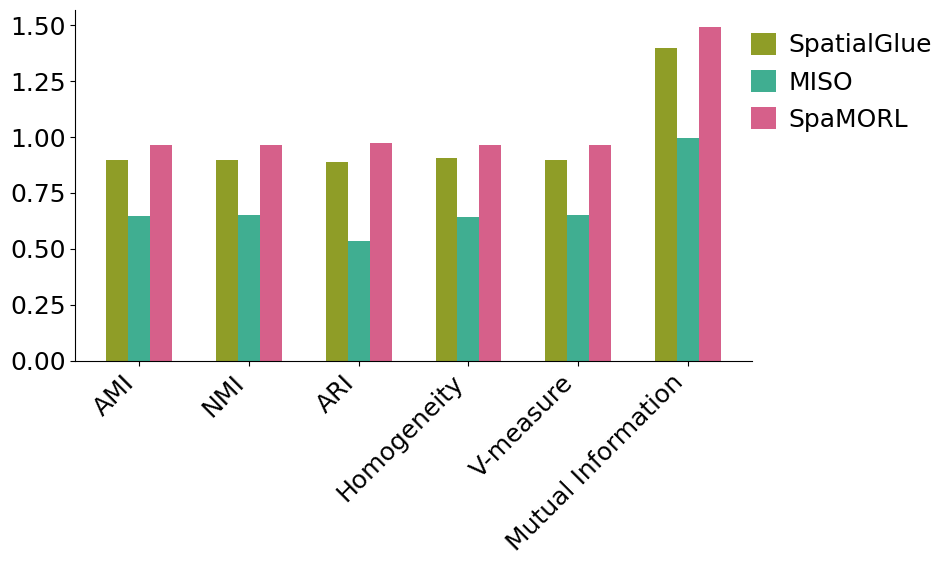

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO', 'SpaMORL']
data = {
     'SpatialGlue': [0.8961, 0.8965, 0.8874, 0.9043, 0.8965, 1.3993],
    'MISO': [0.6490, 0.6504, 0.5374, 0.6431, 0.6504, 0.9952],
    'SpaMORL': [0.9647, 0.9649, 0.9748, 0.9649, 0.9649, 1.4930],
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.2
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#8F9D27', '#40AE91', '#D6608A']

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=18)

# 设置图例，调整标记为正方形
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0.5, fontsize=18, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/Simulation_triple/metrics_3.png', format='png')

plt.show()